**Dataset**

https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia?select=chest_xray

### **Import the dataset**

In [9]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from skimage.transform import resize

directory = "C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray"

def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):  # Ignore hidden files
            if folderName == 'NORMAL':
                label = 0
            elif folderName == 'PNEUMONIA':
                label = 1
            else:
                label = 2  # Add if more categories exist
            folder_path = os.path.join(folder, folderName)
            for image_filename in tqdm(os.listdir(folder_path)):
                image_path = os.path.join(folder_path, image_filename)
                img_file = cv2.imread(image_path)
                if img_file is not None:
                    img_file = resize(img_file, (150, 150, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X, y

X, y = get_data(directory)

# Encode labels to one-hot vectors
from keras.utils import to_categorical
y = to_categorical(y, num_classes=2)

100%|██████████████████████████████████████████████████████████████████████████████| 4273/4273 [08:22<00:00,  8.50it/s]


In [12]:
# Simpan data ke file .npy
np.save('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/X.npy', X)
np.save('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/y.npy', y)

## Import X and y

In [1]:
import numpy as np

# Load data dari file .npy
X = np.load('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/X.npy')
y = np.load('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/y.npy')

## **Vizualize Data**

In [2]:
from glob import glob
import random
import cv2
import matplotlib.pyplot as plt

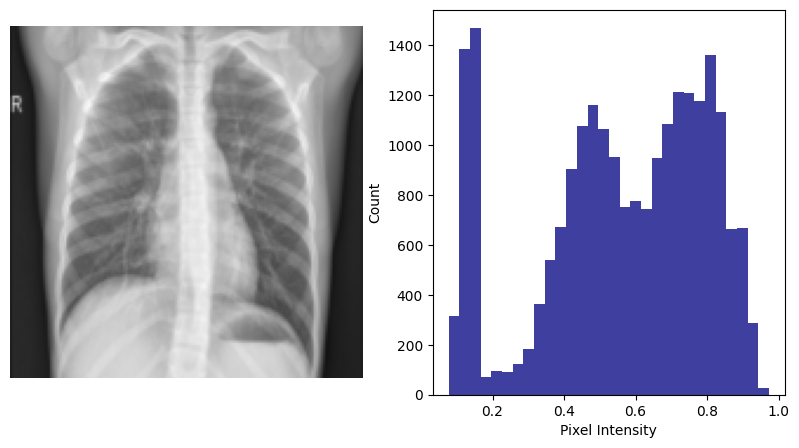

In [3]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X[1])

**3 X-Rays from category "No Pneumonia"**

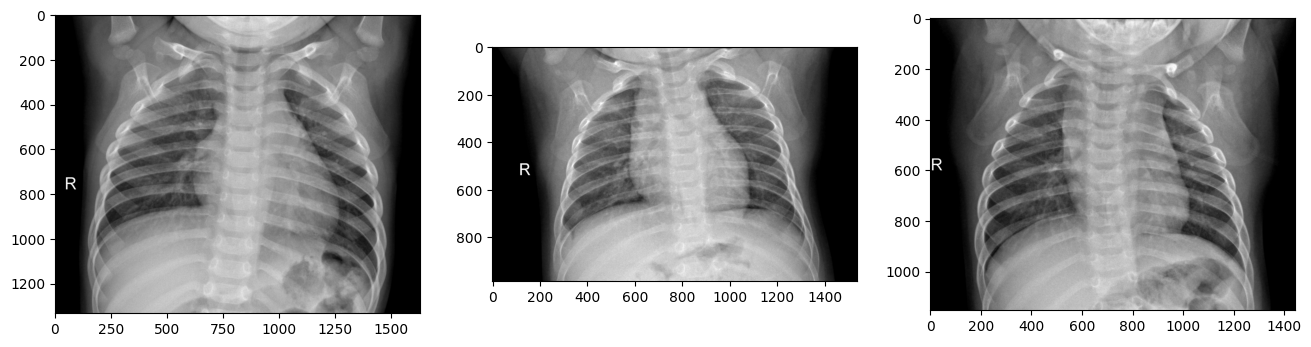

In [4]:
multipleImages = glob('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/NORMAL/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]));
plotThreeImages(multipleImages)

**20 images from category "No Pneumonia"**

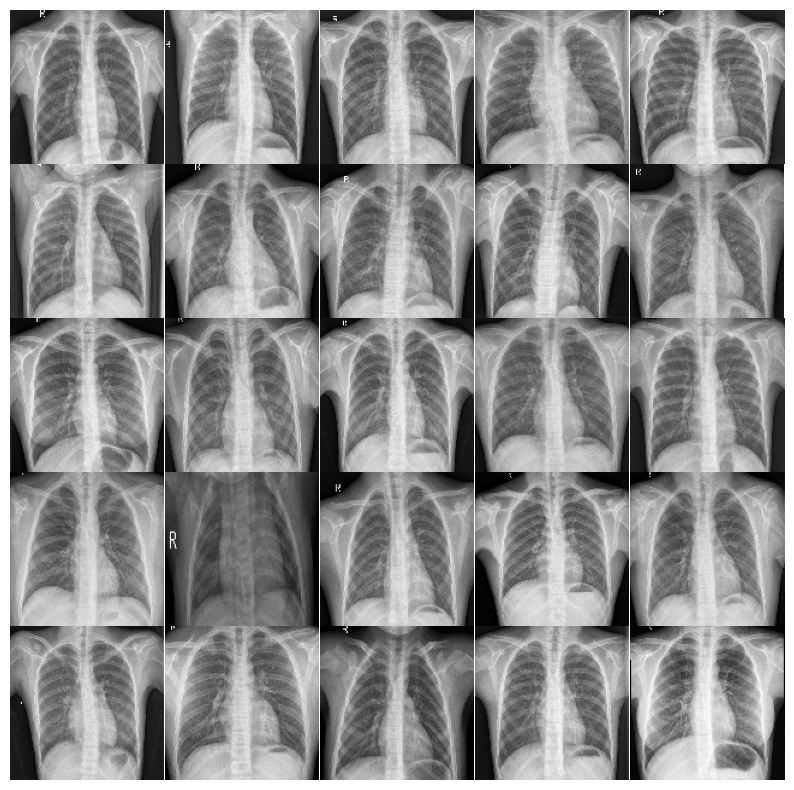

In [5]:
multipleImages = glob('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace = 0, hspace = 0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128))
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

**3 X-Rays from category "Pneumonia"**

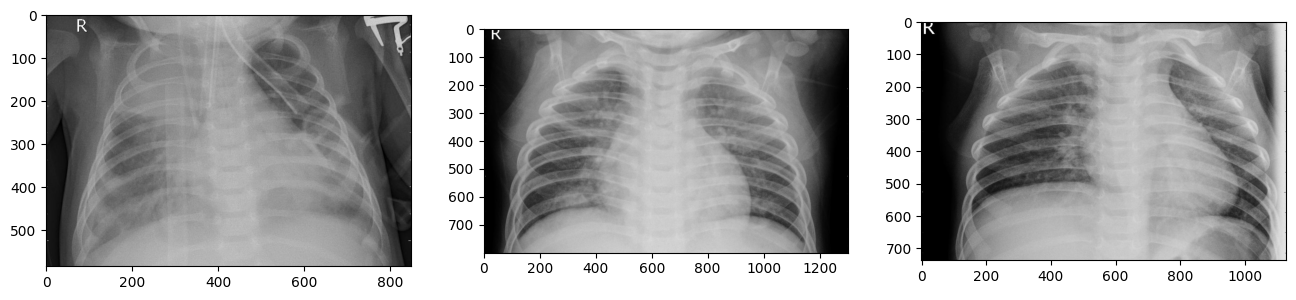

In [6]:
multipleImages = glob('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/PNEUMONIA/**')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize = (16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]));
plotThreeImages(multipleImages)

**20 images from category "Pneumonia"**

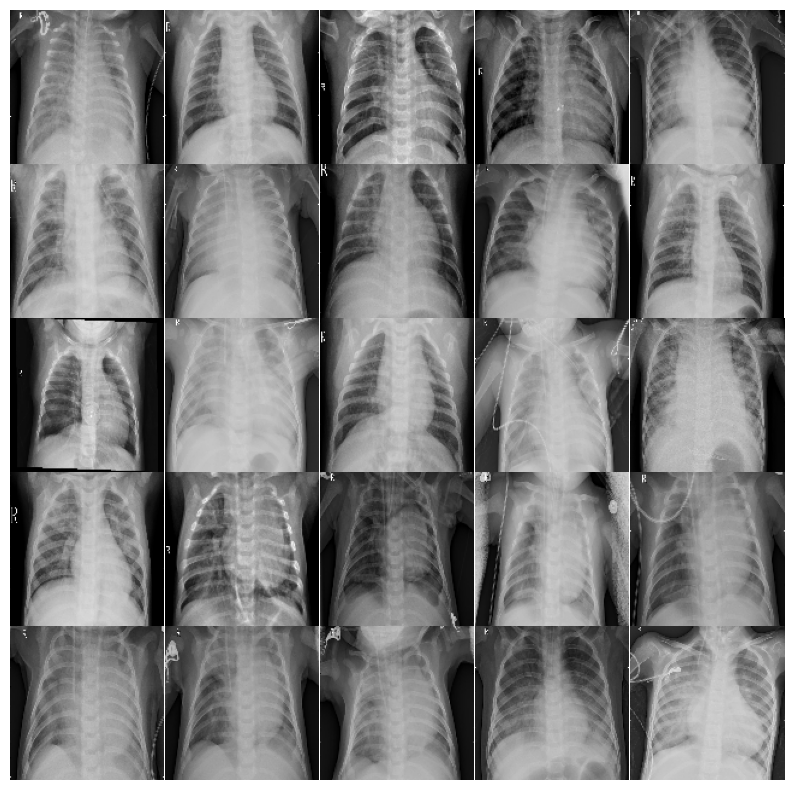

In [7]:
multipleImages = glob('C:/Users/CHRISTY/Machine Learning/FP EAS/chest_xray/xray/PNEUMONIA/**')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace = 0, hspace = 0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128))
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

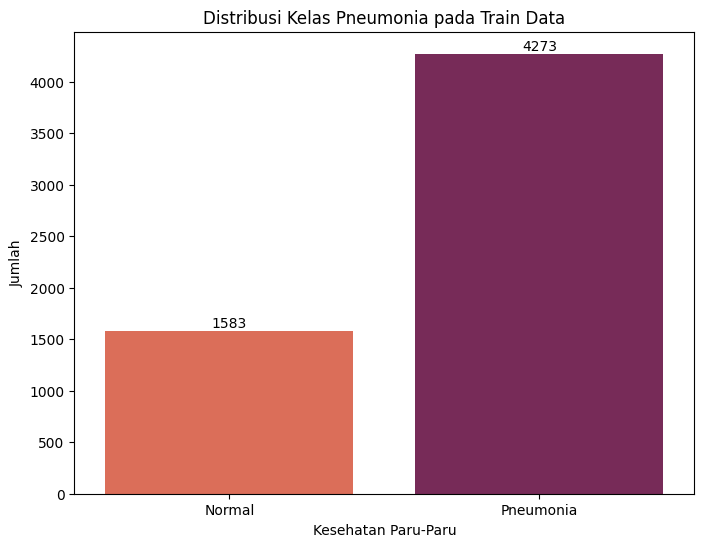

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Decode one-hot encoding to original labels (0 or 1)
y_decoded = np.argmax(y, axis=1)

# Create DataFrame from the decoded labels
df = pd.DataFrame()
df["labels"] = y_decoded

# Pemetaan label 0 menjadi "Normal" dan 1 menjadi "Pneumonia"
label_mapping = {0: 'Normal', 1: 'Pneumonia'}
df["labels"] = df["labels"].map(label_mapping)

# Hitung distribusi label
lab = df['labels']
dist = lab.value_counts()

# Buat plot countplot
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = lab, palette = "rocket_r")

# Tambahkan frekuensi di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom')

# Tambahkan judul dan label sumbu
plt.title('Distribusi Kelas Pneumonia pada Train Data')
plt.xlabel('Kesehatan Paru-Paru')
plt.ylabel('Jumlah')

# Tampilkan plot
plt.show()

## Split Dataset

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shape of the datasets
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (4099, 150, 150, 3) (4099, 2)
Testing data shape: (1757, 150, 150, 3) (1757, 2)


In [10]:
from collections import Counter

y_train_hot = np.argmax(y_train, axis=1).flatten() 
y_test_hot = np.argmax(y_test, axis=1).flatten()

# Check Class Distribution
print("Train class distribution:", Counter(y_train_hot))
print("Test class distribution:", Counter(y_test_hot))

Train class distribution: Counter({1: 2991, 0: 1108})
Test class distribution: Counter({1: 1282, 0: 475})


In [11]:
# Helper Functions  Learning Curves and Confusion Matrix
import os
import itertools
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    def __init__(self, filepath):
        super(MetricsCheckpoint, self).__init__()
        self.filepath = filepath
        self.metrics = {}

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        for key, value in logs.items():
            self.metrics.setdefault(key, []).append(value)
        np.save(self.filepath, self.metrics)

def plotKerasLearningCurve():
    try:
        metrics = np.load('logs.npy', allow_pickle=True)[()]
    except FileNotFoundError:
        print("File logs.npy tidak ditemukan. Metrik tidak dapat ditampilkan.")
        return

    plt.figure(figsize=(10, 5))  # Correct use of plt
    filt = ['acc']  # Add 'loss' to see loss curves if needed
    for k in metrics.keys():
        if any([x in k for x in filt]):
            plt.plot(metrics[k], label=k)

    plt.title("Learning Curve")
    plt.legend()
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

def plotKerasLearningCurveFromHistory(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

In [12]:
from keras.models import Model
from keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix, classification_report

def pretrainedNetwork(xtrain, ytrain, xtest, ytest, pretrainedmodel, pretrainedweights,
                      classweight, numclasses, numepochs, optimizer, labels):
    # Build the base model
    base_model = pretrainedmodel
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze all layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    callbacks_list = [
        EarlyStopping(monitor='val_accuracy', patience=3, verbose=1),
        MetricsCheckpoint('logs.npy')  # Simpan metrik ke file logs.npy
    ]

    # Train the model
    history = model.fit(xtrain, ytrain,
                        epochs=numepochs,
                        batch_size=64,
                        class_weight=class_weight,
                        validation_data=(xtest, ytest),
                        verbose=1,
                        callbacks=callbacks_list)

    # Evaluate the model
    score = model.evaluate(xtest, ytest, verbose=0)
    print(f'\nAccuracy (test): {score[1]:.4f}\n')

    # Predictions
    y_pred = model.predict(xtest)
    print('\n', classification_report(np.argmax(ytest, axis=1),
                                       np.argmax(y_pred, axis=1),
                                       target_names=list(labels.values())),
          sep='')

    # Confusion matrix
    Y_pred_classes = np.argmax(y_pred, axis=1)
    Y_true = np.argmax(ytest, axis=1)
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

    # Plot learning curves and confusion matrix
    plotKerasLearningCurve()  # Visualisasi dari logs.npy
    plotKerasLearningCurveFromHistory(history)  # Visualisasi langsung dari history
    plt.show()

    plot_confusion_matrix(confusion_mtx, classes=list(labels.values()))
    plt.show()

    return model

In [13]:
map_characters1 = {0: 'No Pneumonia', 1: 'Yes Pneumonia'}

In [14]:
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3

weight_path1 = 'imagenet'
weight_path2 = 'imagenet'

# Gunakan bobot yang telah dilatih pada ImageNet
pretrained_model_1 = VGG16(weights = weight_path1, include_top=False, input_shape=(150, 150, 3))
pretrained_model_2 = InceptionV3(weights = weight_path2, include_top=False, input_shape=(150, 150, 3))

In [15]:
from sklearn.utils.class_weight import compute_class_weight

# Compute Class Weights
class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_hot),
    y=y_train_hot
)
class_weight = dict(enumerate(class_weight))
print("Class Weights:", class_weight)

Class Weights: {0: 1.8497292418772564, 1: 0.6852223336676697}


In [16]:
from tensorflow.keras.optimizers import RMSprop

def get_optimizer(learning_rate=0.0001):
    return RMSprop(learning_rate=learning_rate)

# Gunakan optimizer baru
optimizer1 = get_optimizer()

Epoch 1/6
65/65 ━━━━━━━━━━━━━━━━━━━━ 403s 6s/step - accuracy: 0.7417 - loss: 0.5631 - val_accuracy: 0.9118 - val_loss: 0.2979
Epoch 2/6
65/65 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.9203 - loss: 0.2967 - val_accuracy: 0.9300 - val_loss: 0.2353
Epoch 3/6
65/65 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.9258 - loss: 0.2253 - val_accuracy: 0.9374 - val_loss: 0.1876
Epoch 4/6
65/65 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9312 - loss: 0.1978 - val_accuracy: 0.9186 - val_loss: 0.2078
Epoch 5/6
65/65 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9341 - loss: 0.1795 - val_accuracy: 0.9067 - val_loss: 0.2285
Epoch 6/6
65/65 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9306 - loss: 0.1607 - val_accuracy: 0.9482 - val_loss: 0.1527

Accuracy (test): 0.9482

55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 845ms/step

               precision    recall  f1-score   support

 No Pneumonia       0.90      0.91      0.90       475
Yes Pneumonia       0.96      0.96      0.96      1282

     acc

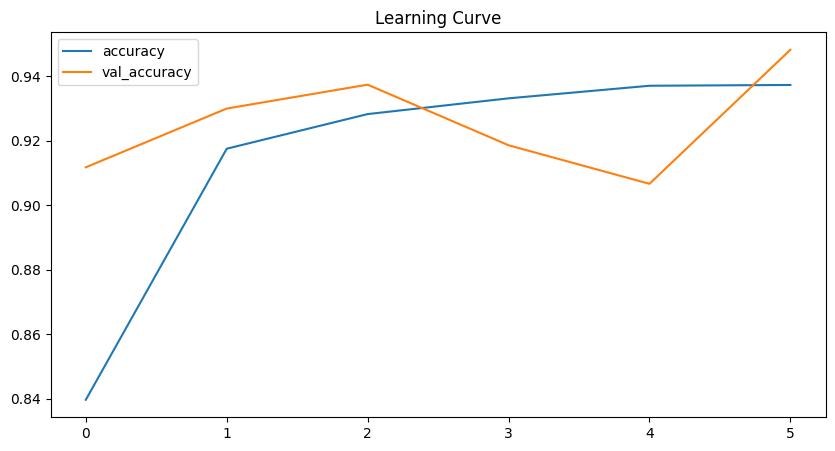

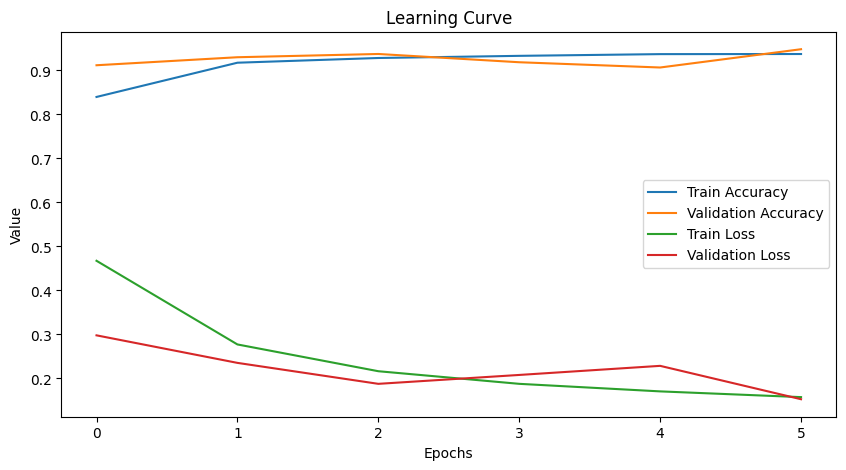

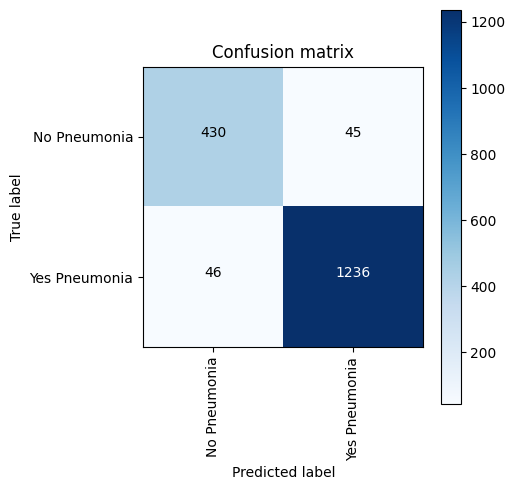

In [17]:
# Build Model
model = pretrainedNetwork(X_train,
                          y_train,
                          X_test,
                          y_test,
                          pretrained_model_1,
                          weight_path1,
                          class_weight,
                          numclasses = 2,
                          numepochs = 6,
                          optimizer = optimizer1,
                          labels = map_characters1)

In [19]:
model.save('model.h5')
print("Model saved as model.h5 successfully!")

Model saved as model.h5 successfully!


In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the trained model
model = tf.keras.models.load_model('model.h5')

In [2]:
# Save the model in the new `.keras` format
model.save('model.keras')  # This saves the model in the newer Keras format

# Load the model using the .keras format
model = tf.keras.models.load_model('model.keras')

C:\Users\CHRISTY\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
